Let's see if all the neq trajectories contain flips, and whether the ones that do flip cluster together in the work plots.

In [24]:
import mdtraj as md
import pickle
import numpy as np
from matplotlib import pyplot as plt
from simtk import openmm, unit
from perses.dispersed import feptasks
from tqdm import tqdm


In [29]:
# Apo barnase:barstar
with open("/data/chodera/zhangi/perses_benchmark/neq/6/13/13_apo.pickle", 'rb') as f:
    htf = pickle.load(f)
    

In [31]:
old_top = md.Topology.from_openmm(htf._topology_proposal.old_topology)


In [36]:
def count_flips(dihedrals):
    flips = 0
    previous_dihedral = dihedrals[0]
    for dihedral in dihedrals:
        if (previous_dihedral > 0.5 and dihedral < 0.5) or (previous_dihedral < 0.5 and dihedral > 0.5):
            flips += 1
        previous_dihedral = dihedral
    return flips
            


In [37]:
# Forward
flips = []
dihedrals_all = []
for i in tqdm(range(100)):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/6/13/13_apo_{i}_forward_neq_old.npy", 'rb') as f:
        pos = np.load(f)
    traj = md.Trajectory(np.array(pos), old_top)
    dihedrals = np.sin(md.compute_dihedrals(traj, np.array([[669, 670, 673, 674]])))
    dihedrals_all.append(dihedrals)
    flips.append(count_flips(dihedrals))
  
    

100%|██████████| 100/100 [00:22<00:00,  4.45it/s]


In [38]:
for i, flip in enumerate(flips):
    print(i, flip)

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1


Based on the previous cell, all of the forward trajectories contain a flip

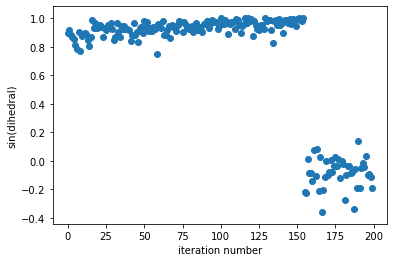

In [40]:
# Cherry pick some of the trajectories and check that I am counting correctly
plt.scatter(range(len(dihedrals_all[0])), dihedrals_all[70])
plt.ylabel("sin(dihedral)")
plt.xlabel("iteration number")
plt.show()


In [41]:
# Reverse
flips = []
dihedrals_all = []
for i in tqdm(range(100)):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/6/13/13_apo_{i}_reverse_neq_old.npy", 'rb') as f:
        pos = np.load(f)
    traj = md.Trajectory(np.array(pos), old_top)
    dihedrals = np.sin(md.compute_dihedrals(traj, np.array([[669, 670, 673, 674]])))
    dihedrals_all.append(dihedrals)
    flips.append(count_flips(dihedrals))
  
    

100%|██████████| 100/100 [00:40<00:00,  2.48it/s]


In [43]:
for i, flip in enumerate(flips):
    print(i, flip)
    
    

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0


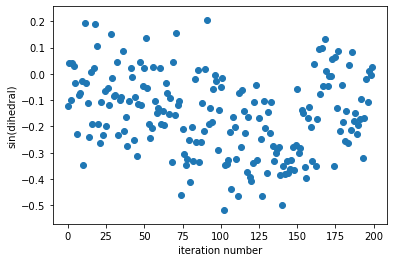

In [46]:
# Cherry pick some of the trajectories and check that I am counting correctly
plt.scatter(range(len(dihedrals_all[0])), dihedrals_all[1])
plt.ylabel("sin(dihedral)")
plt.xlabel("iteration number")
plt.show()
